In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('/content/mobile_price_classification (1).csv')

In [5]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [7]:
data.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [8]:
x = data.drop('price_range', axis=1)

In [9]:
y = data['price_range']

In [10]:
y.unique()

array([1, 2, 3, 0])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
lb = LabelBinarizer()

In [14]:
y_train = lb.fit_transform(y_train)

In [15]:
y_test = lb.transform(y_test)

In [ ]:
#Creating model

In [16]:
from tensorflow.keras import Sequential, layers

In [17]:
model = Sequential([
    layers.Dense(64, activation="relu", input_shape=(x.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="softmax")
                  ])

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
50/50 [==============================] - 2s 11ms/step - loss: 53.2125 - accuracy: 0.4306 - val_loss: 12.9730 - val_accuracy: 0.5275
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 8.6860 - accuracy: 0.5238 - val_loss: 5.6247 - val_accuracy: 0.5600
Epoch 3/20
50/50 [==============================] - 0s 4ms/step - loss: 5.1341 - accuracy: 0.5719 - val_loss: 5.6491 - val_accuracy: 0.5700
Epoch 4/20
50/50 [==============================] - 0s 4ms/step - loss: 4.7068 - accuracy: 0.5894 - val_loss: 7.6446 - val_accuracy: 0.5575
Epoch 5/20
50/50 [==============================] - 0s 4ms/step - loss: 5.2706 - accuracy: 0.5750 - val_loss: 3.6463 - val_accuracy: 0.5750
Epoch 6/20
50/50 [==============================] - 0s 4ms/step - loss: 4.1167 - accuracy: 0.5850 - val_loss: 4.5408 - val_accuracy: 0.6125
Epoch 7/20
50/50 [==============================] - 0s 3ms/step - loss: 3.6313 - accuracy: 0.6050 - val_loss: 4.8599 - val_accuracy: 0.5150
Epoch 8/20
50/50 

In [ ]:
#Evaluating

In [20]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 2.5596 - accuracy: 0.6425


[2.5595648288726807, 0.6424999833106995]

In [21]:
y_pred = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [22]:
y_pred[y_pred>0.5] = 1

In [23]:
y_pred[y_pred<0.5] = 0

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred)

0.6425

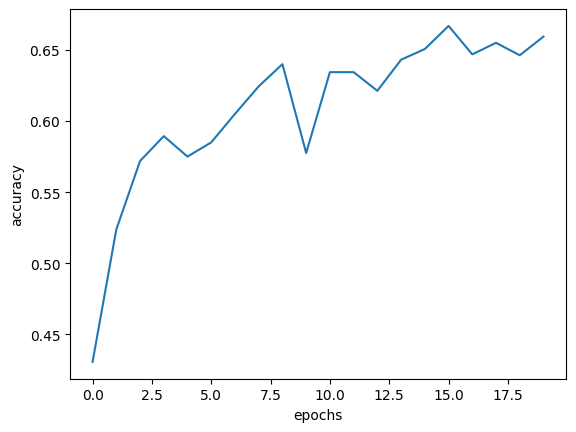

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()